In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('traffic_violaions.csv')
df.head(10)

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
5,3/23/2005,9:45,NaN,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
6,4/1/2005,17:30,NaN,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
7,6/6/2005,13:20,NaN,F,1986.0,19.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
8,7/13/2005,10:15,NaN,M,1970.0,35.0,Black,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
9,7/13/2005,15:45,NaN,M,1970.0,35.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           52966 non-null  object 
 1   stop_time           52965 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       49580 non-null  object 
 4   driver_age_raw      49588 non-null  float64
 5   driver_age          49346 non-null  float64
 6   driver_race         49581 non-null  object 
 7   violation_raw       49581 non-null  object 
 8   violation           49581 non-null  object 
 9   search_conducted    52965 non-null  object 
 10  search_type         2085 non-null   object 
 11  stop_outcome        49581 non-null  object 
 12  is_arrested         49581 non-null  object 
 13  stop_duration       49581 non-null  object 
 14  drugs_related_stop  52965 non-null  object 
dtypes: float64(3), object(12)
memory usage: 6.1+ MB


In [5]:
df.isnull().sum()

stop_date                 0
stop_time                 1
country_name          52966
driver_gender          3386
driver_age_raw         3378
driver_age             3620
driver_race            3385
violation_raw          3385
violation              3385
search_conducted          1
search_type           50881
stop_outcome           3385
is_arrested            3385
stop_duration          3385
drugs_related_stop        1
dtype: int64

In [6]:
df = df.drop(['country_name', 'search_type', 'driver_age_raw'], axis = 1)

In [7]:
df.dropna(how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49340 entries, 0 to 52964
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           49340 non-null  object 
 1   stop_time           49340 non-null  object 
 2   driver_gender       49340 non-null  object 
 3   driver_age          49340 non-null  float64
 4   driver_race         49340 non-null  object 
 5   violation_raw       49340 non-null  object 
 6   violation           49340 non-null  object 
 7   search_conducted    49340 non-null  object 
 8   stop_outcome        49340 non-null  object 
 9   is_arrested         49340 non-null  object 
 10  stop_duration       49340 non-null  object 
 11  drugs_related_stop  49340 non-null  object 
dtypes: float64(1), object(11)
memory usage: 4.9+ MB


In [8]:
df['stop_date'] = pd.to_datetime(df['stop_date'])
df['year'] = df['stop_date'].dt.year
df['quarter'] = df['stop_date'].dt.quarter
df['month'] = df['stop_date'].dt.month
df['day'] = df['stop_date'].dt.day
df.head()


,stop_date,stop_time,driver_gender,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year,quarter,month,day
0,2005-01-02,1:55,M,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,2005,1,1,2
1,2005-01-18,8:15,M,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,2005,1,1,18
2,2005-01-23,23:15,M,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,2005,1,1,23
3,2005-02-20,17:15,M,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False,2005,1,2,20
4,2005-03-14,10:00,F,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,2005,1,3,14


Text(0.5, 1.0, 'Gender Distribution')

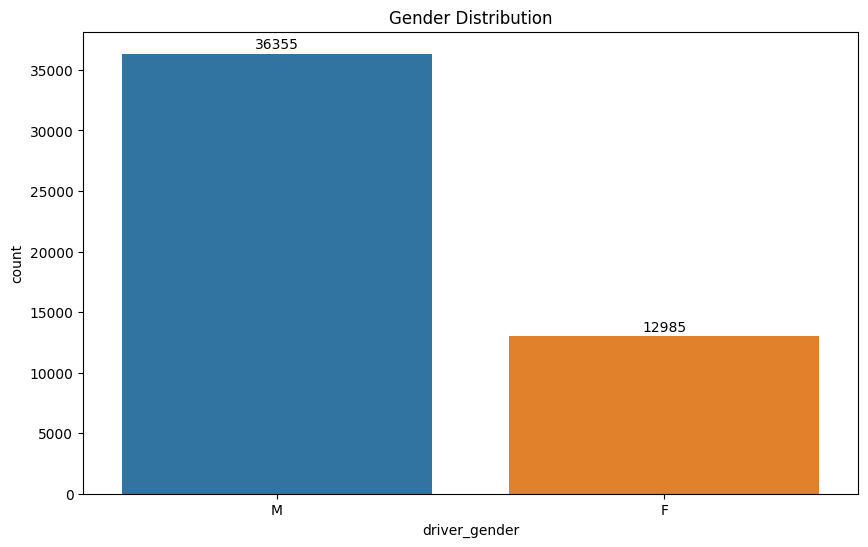

In [14]:
plt.figure(figsize=(10, 6))
plot = sns.countplot(x='driver_gender', data=df)
y_max = plt.gca().get_ylim()[1]

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height() + y_max * 0.02), 
                  ha = 'center', va = 'center')
plt.title('Gender Distribution')

Text(0.5, 1.0, 'Violations')

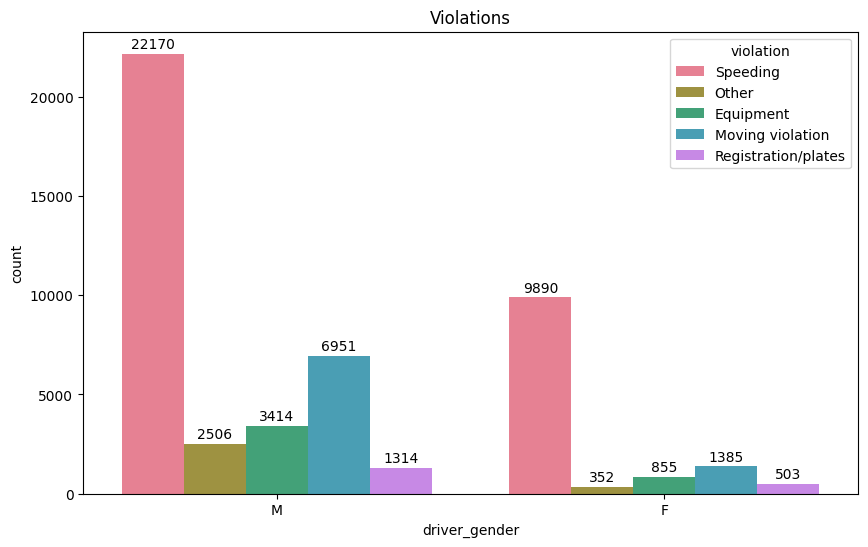

In [18]:
plt.figure(figsize=(10, 6))
plot = sns.countplot(x='driver_gender', data=df, hue='violation', palette='husl')
y_max = plt.gca().get_ylim()[1]

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height() + y_max * 0.02), 
                  ha = 'center', va = 'center')
plt.title('Violations')

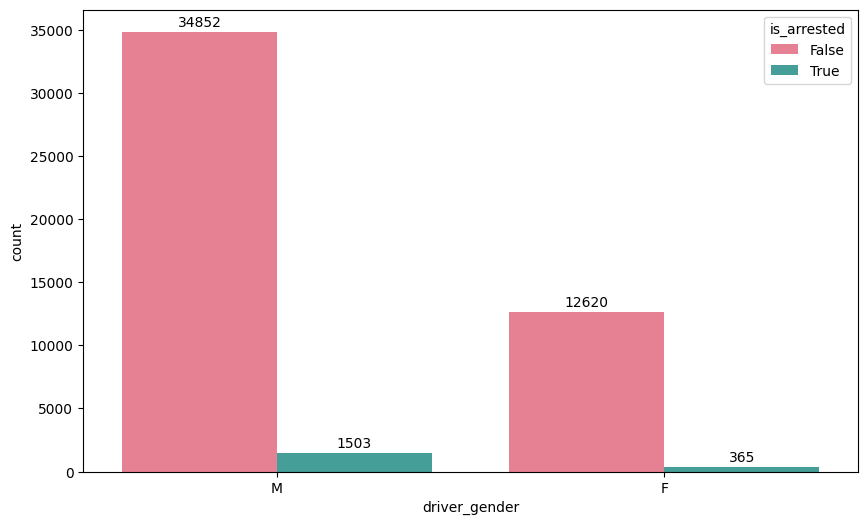

In [50]:
plt.figure(figsize=(10, 6))
plot = sns.countplot(x='driver_gender', data=df, hue='is_arrested', palette='husl')
y_max = plt.gca().get_ylim()[1]

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height() + y_max * 0.02), 
                  ha = 'center', va = 'center')

Text(0.5, 1.0, 'Arrested')

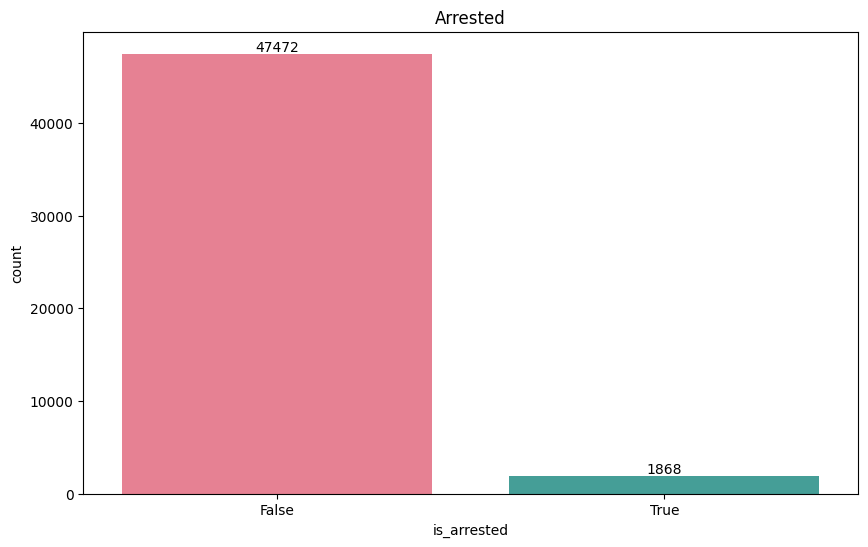

In [52]:
plt.figure(figsize=(10, 6))
plot = sns.countplot(x='is_arrested', data=df, palette='husl')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height() + y_max * 0.02), 
                  ha = 'center', va = 'center')
plt.title('Arrested')

Text(0.5, 1.0, 'Arrested or Not')

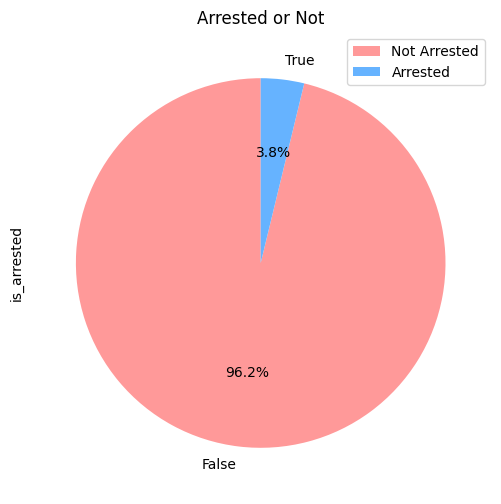

In [15]:
plt.figure(figsize=(10, 6))
df['is_arrested'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.legend(['Not Arrested', 'Arrested'])
plt.title('Arrested or Not')

Text(0.5, 1.0, 'Driver races')

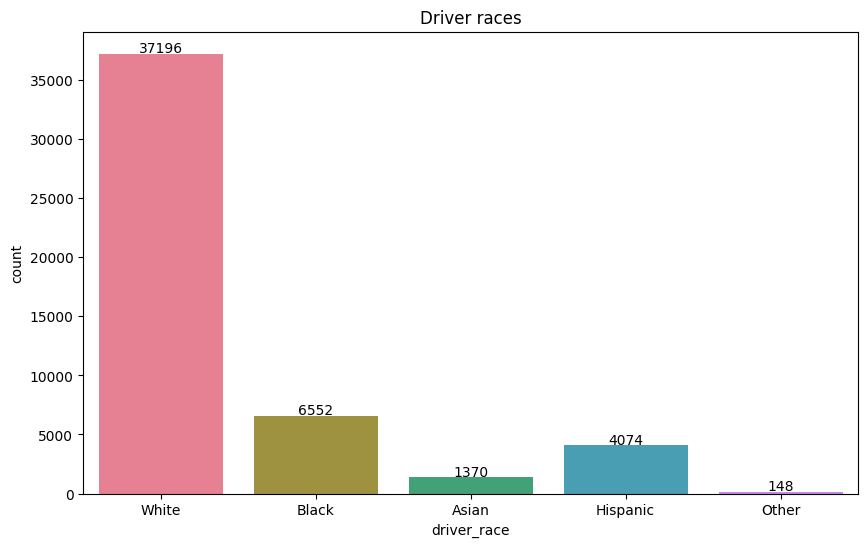

In [21]:
plt.figure(figsize=(10, 6))
plot = sns.countplot(x='driver_race', data=df, palette='husl')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height() + y_max * 0.02), 
                  ha = 'center', va = 'center')
    
plt.title('Driver races')

Text(0.5, 1.0, 'Driver races arrested or not')

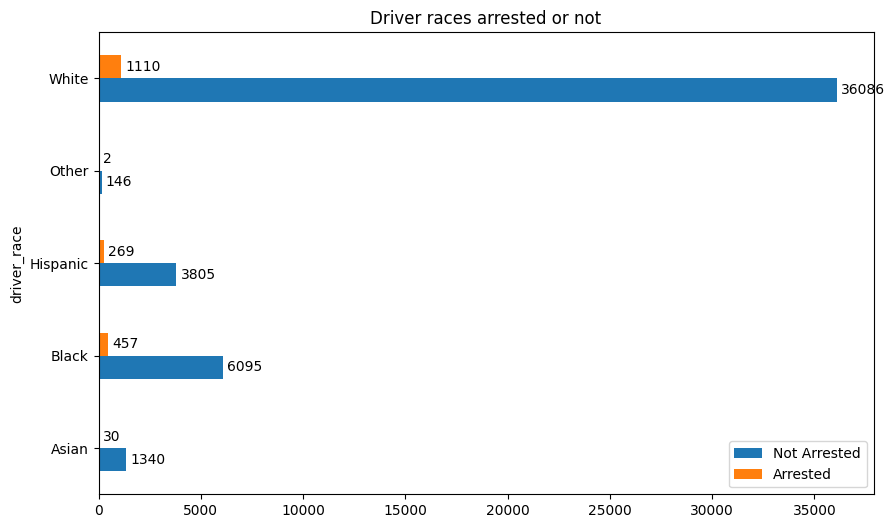

In [42]:
driver_race_arrested = df.groupby('driver_race')['is_arrested'].value_counts().unstack()

barh = driver_race_arrested.plot(kind='barh', stacked=False, figsize=(10, 6))

for p in barh.patches:
    barh.annotate(format(p.get_width(), '.0f'), 
                  (p.get_width(), p.get_y() + p.get_height() / 2), 
                  ha='left', va='center', 
                  xytext=(3, 0), 
                  textcoords='offset points')
plt.legend(['Not Arrested', 'Arrested'])
plt.title('Driver races arrested or not')

Text(0.5, 1.0, 'Driver races violation')

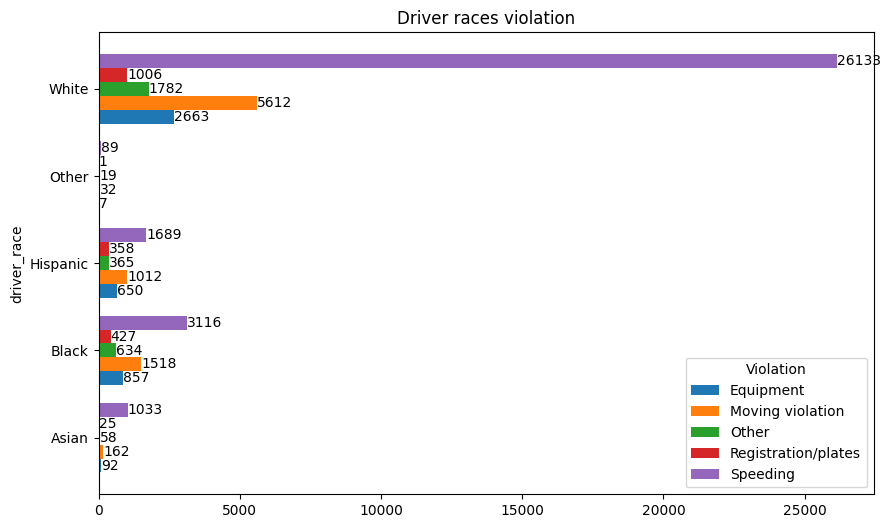

In [48]:
driver_race_violation = df.groupby('driver_race')['violation'].value_counts().unstack()

fig, ax = plt.subplots(figsize=(10, 6))
barh = driver_race_violation.plot(kind='barh', stacked=False, figsize=(10, 6), ax=ax, width=0.8)

for p in barh.patches:
    barh.annotate(format(p.get_width(), '.0f'), 
                  (p.get_width(), p.get_y() + p.get_height() / 2), 
                  ha='left', va='center',)

plt.legend(title='Violation')  
plt.title('Driver races violation')